In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

In [22]:
class Tensor:
    
    def __init__(self, mode="const", *args):
        self.data = data
        self.shape = shape
        
        if mode == "const":
            self.data = [value for i in range(self.shape)]
            
        else:
            self.data = []
            
    def plus_module(self):
        
        self.data = [max(0, element) for element in self.data]
        

In [23]:
class TensorGenerator:
    
    """
    
        Initialize
        
        Params:
        
        (*) p:
        (*) S:
        (*) I_q:
        (*) x:
        (*) max_count:
        (*) Q_1:
        (*) Q_2:
    
    
    """
    def __init__(self, p, S, I_q, x, max_count, Q_1, Q_2):
        self.p = p
        self.S = S
        self.I_q = I_q
        self.x = x
        self.max_count = max_count
        self.Q_1 = Q_1
        self.Q_2 = Q_2
      
    
    """
        If point belongs to I, then return I
        I - means array of indices 
            (for univariate time series it is single index)
    
    
    """
    def Quantify(self, x):
        return None
    
    
    """
    
        Get constant tensor, which elements are equal to value, 
        thrown as the function parameter
    
    
    """
    
    
    def randomize(self, random_state=42):
        return np.random.randint(20, random_state=random_state)
    
    
    """
    
        Run an algo
    
    
    """    
    def run(self):
        self.T = Tensor(mode="const", value=p[0])
        
        P_next_position = 0
        for step_q in range(self.max_count):
            t = self.randomize(42)
            for q in range(self.Q_1):
                I_q_current = self.Quantify(self.x[t])
                
                
                numenator = sum(T(I_q_current, list(range(1, self.q+1)),
                                  self.I_q, list(range(self.q+1, self.S+1)),
                                  p_current, list(range(1, self.q+1)),
                                  self.p, list(range(self.q+1, self.S))))
                
                denominator = sum(T(I_q_current, list(range(1, self.q+1)),
                                  self.I_q, list(range(self.q+1, self.S+1)),
                                  p_current, list(range(1, self.q)),
                                  self.p, list(range(self.q, self.S))))
                
                
                
                P_next_position =  numenator / denominator
                
                
            I_q_current = self.Quantify(self.x[t])
            
            
            T = T(I_q_current, [_ for _ in range(1, self.S + 1)],
                  self.I_q, [],
                  p_current, [_ for _ in range(1, self.S)],
                  self.p, []) + \
                P_next_position
            
            
            T = (T-Tensor(value=P_next_position, mode="const")) \
                .plus_module()
            
            
        return T
    
    
   

In [24]:
class Data:
    def __init__(self, x):
        self.filled = [0 for _ in range(len(x))]
        self.x = x
        
    def get_filled_list(self):
        return self.filled
    
    def fill_position(self, position):
        self.filled[position] = 1

In [25]:
class TimeSeriesGenerator:
    
    def __init__(self, p, I_q, Q_3, position, X):
        self.p = p
        self.I_q = I_q
        self.T = TensorGenerator(p, S, I_q, x, max_count, Q_1, Q_2)
        self.position = position
        self.X = X
        self.Q_3 = Q_3
        self.condition = True
        
    def run(self):
        while self.condition:
            
            numenator = Tensor(self.I_q, list(range(1, self.position+1)),
                   self.I_q, list(),
                   self.p, list(range(1, self.position)),
                   self.p, list())
            
            
            denominator = sum(T(self.I_q, list(range(1, self.position)),
                     I_q, list(self.position),
                     p.copy(), list(range(1, self.position-1)),
                     p, list(self.position-1)))
            
            prob = numenator / denominator
            
            
                 
            if X.get_filled_list[self.position] == 1:
                self.position = X.get_filled_list().find(0)
                continue
            else:
                if prob >= self.Q3:
                    self.position += prob
                else:
                    self.position = X.get_filled_list().find(0)
                    if self.position is None:
                        break
                    else:
                        continue
                        
        print("Success!")
        return X
        

In [26]:
def run_with_default_params(X):
    
    return TimeSeriesGenerator(X=X).run()

In [30]:
pd.read_excel("MHLV_data-2015-2017.xlsx")

,MeasureItem,DateUTC,DateShort,TimeFrom,TimeTo,CountryCode,Cov_ratio,Value,Value_ScaleTo100
0,Monthly Hourly Load Values,2014-12-31 23:00:00,2014-12-31,23:00:00,00:00:00,DE,98,46419.79,47367.132653
1,Monthly Hourly Load Values,2015-01-01 00:00:00,2015-01-01,00:00:00,01:00:00,DE,98,44898.30,45814.591837
2,Monthly Hourly Load Values,2015-01-01 01:00:00,2015-01-01,01:00:00,02:00:00,DE,98,43305.31,44189.091837
3,Monthly Hourly Load Values,2015-01-01 02:00:00,2015-01-01,02:00:00,03:00:00,DE,98,41918.17,42773.642857
4,Monthly Hourly Load Values,2015-01-01 03:00:00,2015-01-01,03:00:00,04:00:00,DE,98,41330.17,42173.642857
...,...,...,...,...,...,...,...,...,...
631595,Monthly Hourly Load Values,2017-12-31 23:00:00,2017-12-31,23:00:00,00:00:00,RS,100,5095.00,5095.000000
631596,Monthly Hourly Load Values,2017-12-31 23:00:00,2017-12-31,23:00:00,00:00:00,SE,100,16054.00,16054.000000
631597,Monthly Hourly Load Values,2017-12-31 23:00:00,2017-12-31,23:00:00,00:00:00,SI,100,1130.00,1130.000000
631598,Monthly Hourly Load Values,2017-12-31 23:00:00,2017-12-31,23:00:00,00:00:00,SK,100,2844.67,2844.670000


In [ ]:
df =  pd.read_excel("MHLV_data-2015-2017.xlsx")['CountryCode', 'DateUTC']

In [71]:
# Simulated dataset


series = np.load("simulation_2.npy")

t, x = series[:500, 0], series[:500, 2]

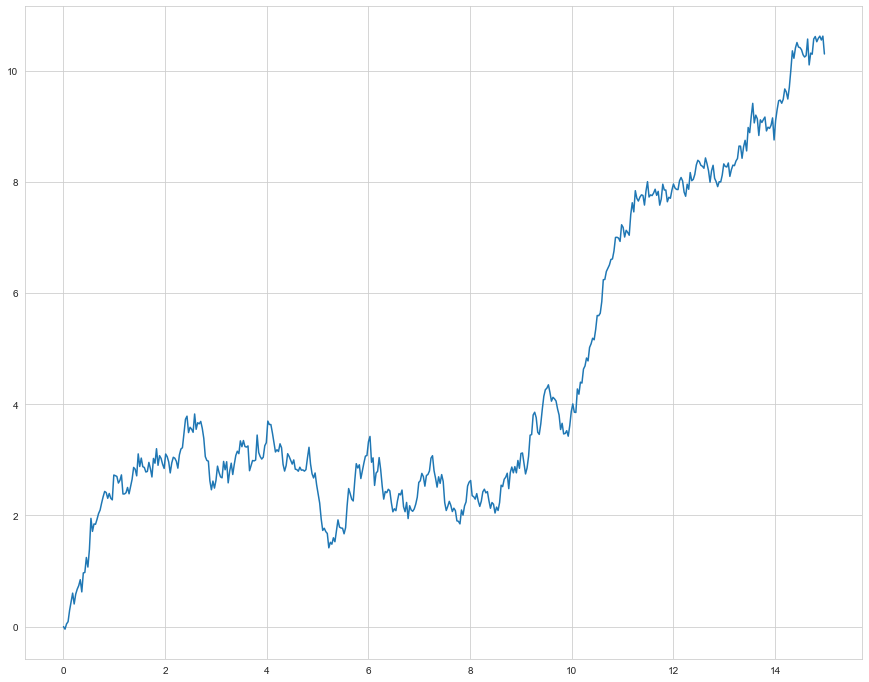

In [72]:
fig, axes = plt.subplots(1, 1, figsize=(15, 12))


axes.plot(t, x)



plt.show()

In [74]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

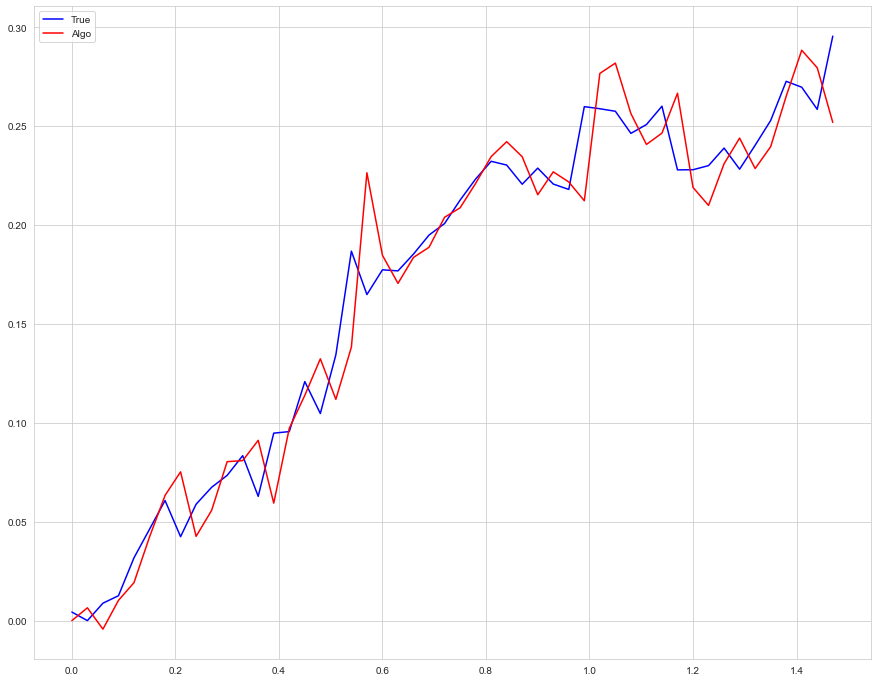

In [110]:
fig, axes = plt.subplots(1, 1, figsize=(15, 12))


axes.plot(t[:50], x[:50], color='b', label='True')
axes.plot(t[:50], preds[:50], color='r', label='Algo')



plt.legend()
plt.show()